In [101]:
import os
os.getcwd()
#os.chdir('/Users/....')

'/Users/clairesun/Desktop/Sales_Forecast'

In [102]:
os.chdir('/Users/clairesun/desktop/Sales_Forecast')

In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('sales_train_v2.csv')

In [104]:
# add categories,if want to analyze by category later
df_add_categories = df.set_index('item_id').join(item.set_index('item_id')).drop('item_name', axis=1).reset_index()

In [105]:
# prices are tricky
df_add_categories.reset_index().groupby(['item_id', 'date_block_num', 'shop_id']).mean()

index   item_price  item_cnt_day  \
item_id date_block_num shop_id                                         
0       20             54             0.0    58.000000      1.000000   
1       15             55             1.5  4490.000000      1.000000   
        18             55             3.0  4490.000000      1.000000   
        19             55             4.0  4490.000000      1.000000   
        20             55             5.0  4490.000000      1.000000   
        21             55             6.0  4490.000000      1.000000   
2       19             54             7.0    58.000000      1.000000   
        22             54             8.0    58.000000      1.000000   
3       18             54             9.0   100.000000      1.000000   
        19             54            10.0    58.000000      1.000000   
4       20             54            11.0    58.000000      1.000000   
5       23             54            12.0    28.000000      1.000000   
6       18             54            13.0   100.000000      1.000000   
7       23             54            14.0    28.000000      1.000000   
8       19             54            15.0    58.000000      1.000000   
        20             54            16.0    58.000000      1.000000   
9       19             54            17.0    58.000000      1.000000   
10      24             54            18.0    28.000000      1.000000   
11      22             54            19.0    58.000000      1.000000   
12      1              54            20.0   189.000000      1.000000   
13      20             54            21.0    58.000000      1.000000   
14      23             54            22.0    28.000000      1.000000   
15      22             54            23.0    58.000000      1.000000   
16      20             56            24.0    58.000000      1.000000   
17      20             44            25.0    98.000000      1.000000   
18      19             25            26.0    58.000000      1.000000   
19      0              25            27.0    28.000000      1.000000   
20      19             54            28.0    58.000000      1.000000   
21      20             54            29.0    58.000000      1.000000   
22      27             54            30.0    28.000000      1.000000   
...                                   ...          ...           ...   
22167   31             35       2935769.0   299.000000      1.000000   
                       39       2935771.0   299.000000      1.000000   
                       42       2935767.0   299.000000      1.000000   
                       52       2935772.5   299.000000      1.000000   
        32             12       2935801.5   299.000000      1.000000   
                       21       2935797.5   299.000000      1.000000   
                       22       2935794.5   299.000000      1.000000   
                       24       2935805.0   299.000000      1.000000   
                       25       2935807.5   299.000000      1.000000   
                       42       2935791.0   299.000000      1.333333   
        33             6        2935825.0   299.000000      1.000000   
                       10       2935824.0   155.000000      1.000000   
                       12       2935819.0   299.000000      1.000000   
                       18       2935823.0   299.000000      1.000000   
                       21       2935830.0   299.000000      1.000000   
                       22       2935836.0   294.922727      1.272727   
                       25       2935827.5   299.000000      1.500000   
                       26       2935826.0   299.000000      1.000000   
                       28       2935829.0   299.000000      1.000000   
                       37       2935810.0   299.000000      1.000000   
                       42       2935813.0   299.000000      1.333333   
                       47       2935811.0   299.000000      1.000000   
                       50       2935815.0   299.000000      1.000000   
2216

In [106]:
# check with item have the most sales QTY
group = df.groupby(['item_id'])['item_cnt_day'].sum()
group.max

<bound method Series.max of item_id
0           1.0
1           6.0
2           2.0
3           2.0
4           1.0
5           1.0
6           1.0
7           1.0
8           2.0
9           1.0
10          1.0
11          1.0
12          1.0
13          1.0
14          1.0
15          1.0
16          1.0
17          1.0
18          1.0
19          1.0
20          1.0
21          1.0
22          1.0
23          1.0
24          1.0
25          1.0
26          1.0
27         42.0
28         84.0
29         12.0
          ...  
22140     287.0
22141      53.0
22142      10.0
22143     865.0
22144     116.0
22145     320.0
22146      29.0
22147      61.0
22148       2.0
22149      35.0
22150      58.0
22151     371.0
22152      85.0
22153       9.0
22154      59.0
22155      74.0
22156       4.0
22157       4.0
22158       1.0
22159      15.0
22160      49.0
22161       1.0
22162     699.0
22163      75.0
22164     493.0
22165       2.0
22166     348.0
22167    1320.0
22168       6.0
2216

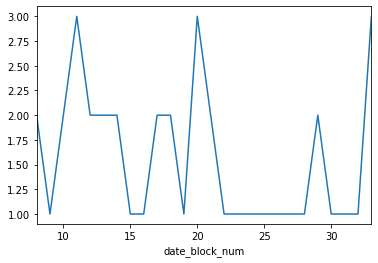

In [107]:
# plot sales of item 22167
df_item = df_add_categories.loc[df_add_categories['item_id']==22167]
group = df_item.groupby(['date_block_num'])['item_price'].nunique()
group.plot(kind='line')

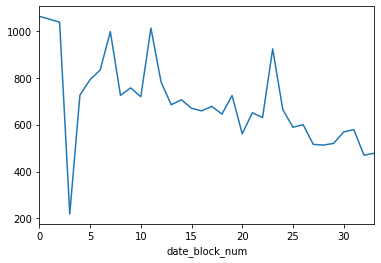

In [108]:
# with time going, shop 4 had less and less items for sale
df_total_items = df_shop4.groupby(['date_block_num'])['item_id'].nunique()
df_total_items.plot(kind='line')

In [109]:
from fbprophet import Prophet

In [110]:
df_fbprophet = df.loc[(df['item_cnt_day']>0)&
                                (df['item_id']==22167) &
                               (df['date_block_num']<34)]

df_fbprophet = df_fbprophet.drop(['date_block_num','shop_id','item_id','item_price'],axis=1)

df_fbprophet

,date,item_cnt_day
849867,29.09.2013,1.0
852087,28.09.2013,1.0
852088,30.09.2013,5.0
857451,30.09.2013,1.0
857452,29.09.2013,1.0
857453,28.09.2013,2.0
857454,27.09.2013,6.0
857455,26.09.2013,5.0
857456,25.09.2013,6.0
857457,24.09.2013,3.0


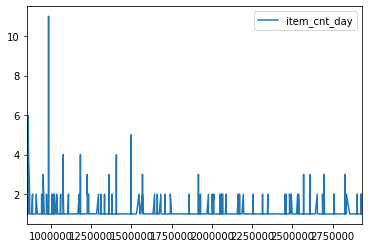

In [111]:
df_fbprophet.plot(kind='line')

In [112]:
my_model = Prophet(interval_width=0.95)

In [113]:
df_fbprophet = df_fbprophet.rename(columns={'date': 'ds',
                        'item_cnt_day': 'y'})
df_fbprophet

,ds,y
849867,29.09.2013,1.0
852087,28.09.2013,1.0
852088,30.09.2013,5.0
857451,30.09.2013,1.0
857452,29.09.2013,1.0
857453,28.09.2013,2.0
857454,27.09.2013,6.0
857455,26.09.2013,5.0
857456,25.09.2013,6.0
857457,24.09.2013,3.0


In [114]:
my_model = Prophet(daily_seasonality=True)
my_model.fit(df_fbprophet)

In [115]:
future1 = my_model.make_future_dataframe(periods=30)
forecast1 = my_model.predict(future1)
forecast1.tail().T

,1138,1139,1140,1141,1142
ds,2016-01-03 00:00:00,2016-01-04 00:00:00,2016-01-05 00:00:00,2016-01-06 00:00:00,2016-01-07 00:00:00
trend,0.631899,0.631871,0.631842,0.631813,0.631784
yhat_lower,0.258085,0.193719,0.290706,0.350223,0.360742
yhat_upper,1.7657,1.77056,1.82318,1.84865,1.79605
trend_lower,0.631594,0.631523,0.631463,0.631394,0.631303
trend_upper,0.632261,0.632254,0.63225,0.632242,0.632244
additive_terms,0.391479,0.344677,0.423094,0.451265,0.460001
additive_terms_lower,0.391479,0.344677,0.423094,0.451265,0.460001
additive_terms_upper,0.391479,0.344677,0.423094,0.451265,0.460001
daily,0.463997,0.463997,0.463997,0.463997,0.463997


In [116]:
forecast = my_model.predict(forecast1)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1138,2016-01-03,1.023378,0.287639,1.789017
1139,2016-01-04,0.976548,0.204136,1.762735
1140,2016-01-05,1.054936,0.289061,1.857812
1141,2016-01-06,1.083078,0.330582,1.839242
1142,2016-01-07,1.091786,0.354148,1.852561


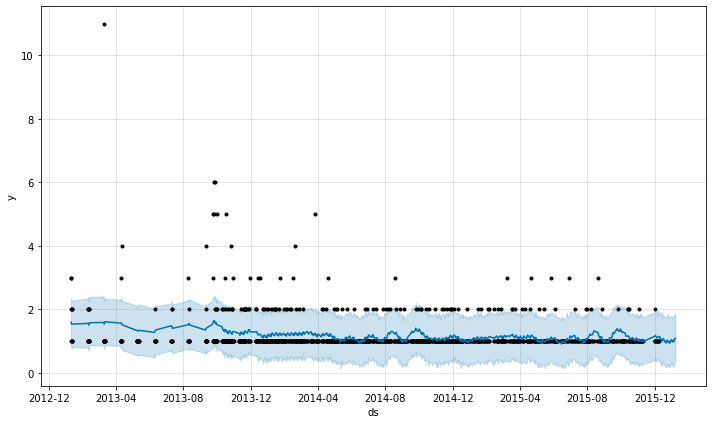

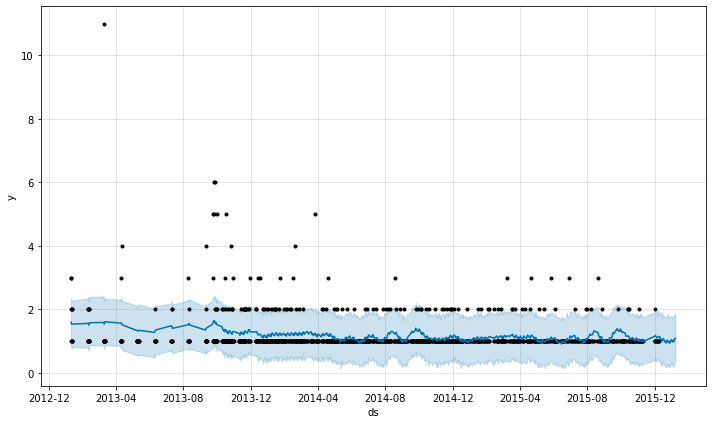

In [117]:
my_model.plot(forecast1,
              uncertainty=True)

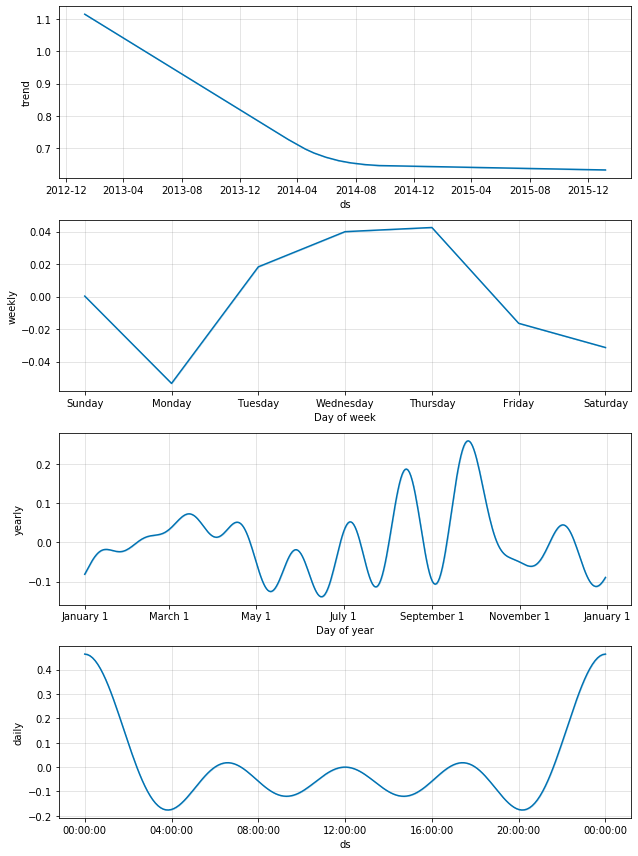

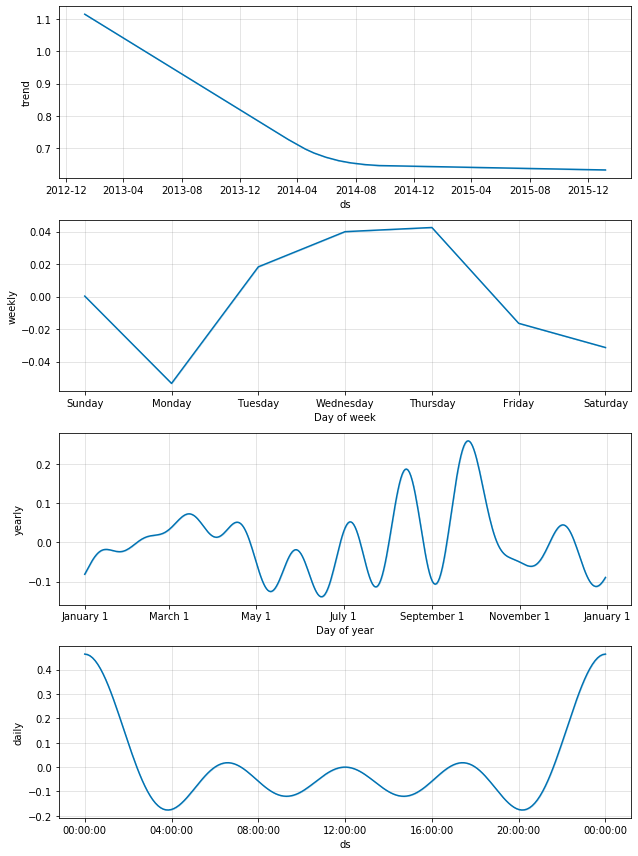

In [118]:
my_model.plot_components(forecast1)